# Dimensionality Reduction on <font color=gray>Linear Data</font> using <font color=red>LDA </font>

We apply __Linear Discriminant Analysis (LDA)__ to reduce the number of features. We've already baselined with original set of features <a href='http://localhost:8888/notebooks/Exercises/Ex_MachineLearning/Pluralsight/Reducing%20Complexity%20in%20data/Baseline%20Regression%20Model.ipynb'/>Baseline Regression Model</a>. After reducing the features using LDA, we fit a regression model to the data and compare with baseline.

__<font color=red>Linear Discriminant Analysis (LDA)</font>__ re-orients data to __preserve__ the __separation__ of __clustered data points__. It is done by __maximizing the distance__ between points of different __categories__.

__Principal Component Analysis (PCA)__ chooses axis to __maximize the variance__ in the underlying __data__.

<img src='Data/PCA vs LDA.png' width=500/>

<img src='Data/Projection in Dimensionality Reduction.png' width=500/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [5]:
X.shape

(178, 13)

In [6]:
X.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0


Objective of this exercise:
- To apply LDA to study how the re-oriented data looks like.
- Not going to fit any model to the data

In [7]:
target_names = wine.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Text(0, 0.5, 'nonflavanoid_phenols')

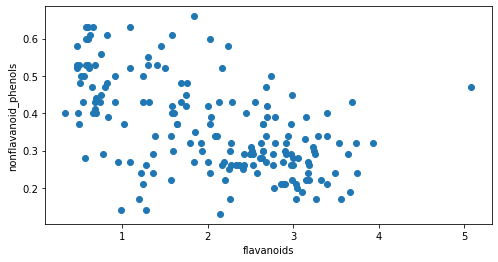

In [10]:
# Let us study how flavanoids and nonflavanoid_phenols are distributed

fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(X['flavanoids'], X['nonflavanoid_phenols'])

plt.xlabel('flavanoids')
plt.ylabel('nonflavanoid_phenols')

Observations:
- As the above distribution lacks the class information we could not really see how the distribution is

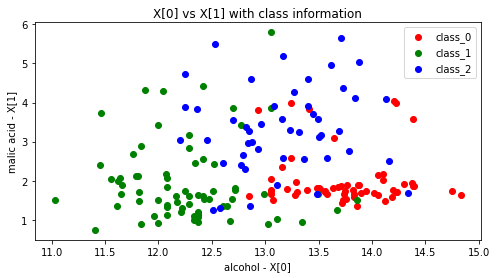

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.array(X)

for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(x[y==i, 0], x[y==i, 1], c=c, label=target_name)

plt.title('X[0] vs X[1] with class information')
plt.xlabel('alcohol - X[0]')
plt.ylabel('malic acid - X[1]')

plt.legend()
plt.show()

Observations:
- Clearly the data points are not separable

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

In [14]:
X_new = lda.fit_transform(X, y)

In [15]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [16]:
X_new = pd.DataFrame(X_new)
X_new

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224
...,...,...
173,4.291508,3.390332
174,4.503296,2.083546
175,5.047470,3.196231
176,4.276155,2.431388


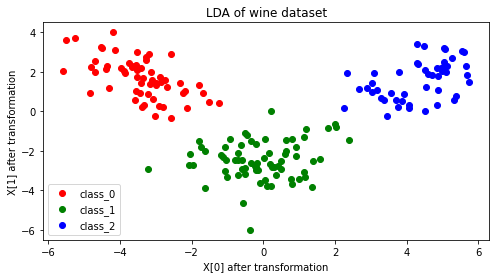

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

x_new = np.array(X_new)

for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(x_new[y==i, 0], x_new[y==i, 1], c=c, label=target_name)

plt.title('LDA of wine dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation')

plt.legend()
plt.show()

In [18]:
lda_corr = X_new.corr()
lda_corr

,0,1
0,1.000000e+00,6.747742e-16
1,6.747742e-16,1.000000e+00


Obsevations:
- Notice that the correlation between these two axes is almost 0
- <font color=red>LDA</font> is a great tool for __Classification__ or __Clustering__ problems